
# **CAP 5516 - Medical Image Computing (Spring 2025)**
Programming Assignment #3 (40 points) \
**Due: 4/11/2025, 11:59 PM (EST)** \


## **Parameter Efficient Fine-tuning Foundation Model for Nuclei Instance Segmentation**

### 1. **Dataset** 

NuInsSeg: A Fully Annotated Dataset for Nuclei Instance Segmentation in H&E-Stained Histological Images [1].
The dataset and detailed step-by-step instructions to generate related segmentation masks are publicly available at
https://www.kaggle.com/datasets/ipateam/nuinsseg and https://github.com/masih4/NuInsSeg, respectively.\
The dataset can also be downloaded from here: https://zenodo.org/records/10518968

### 2. **Task**

Review the dataset paper [1] and its corresponding GitHub repository [2] to familiarize yourself with the
experimental setup. You will follow the experiment setting as described in the paper.
For segmentation, we will utilize the Segment Anything Model (SAM) [3]. To enhance resource efficiency, select
one of the optimized versions of the original SAM model: MobileSAM [4], EfficientSAM [5], or TinySAM [6]. You
may choose any of these variants along with their pre-trained models. I highly suggest you use these efficient SAM
models. However, if you have the resource to run the original SAM model, that is also fine.
Assuming the use of the MobileSAM model, we will apply LoRA [7] for parameter-efficient fine-tuning to perform
nuclei instance segmentation on the NuInsSeg dataset [1].

### 3. **What to report**

1) The details of your implementation of applying LoRA for efficient fine-tuning.

2) Follow Table 3 in the dataset paper [1] and report the average results based on five-fold cross-validation in terms of those metrics (e.g., Dice, AJI, PQ). I hope your results can be much better than those baseline methods in the paper.

3) Since we will use LoRA for fine tuning, report the # of tunable parameters.

4) Provide a few examples of visual comparison of the predicted segmentation masks and the ground truth
masks.

### 4. **What to submit** ###

(1) A report for this assignment. Specifically, a detailed network architecture framework (figure) is required. For
example, how the LoRA layers are applied in your efficient fine-tuning framework. The implementation details are
important.\

(2) Clean code and clear instructions (e.g., a readme file) to reproduce your results. If you choose to host the code on
GitHub, please provide the GitHub link.


**Useful resources (e.g. examples of applying LoRA for SAM fine tuning)**
1. Finetune SAM on your customized medical imaging dataset https://github.com/mazurowski-lab/finetune-
SAM
2. Medical SAM Adapter https://github.com/SuperMedIntel/Medical-SAM-Adapter
3. https://github.com/tianrun-chen/SAM-Adapter-PyTorch
4. MeLo: Low-rank Adaptation is Better than Finetuning for Medical Image
https://github.com/JamesQFreeman/LoRA-ViT
5. SAMed: https://github.com/hitachinsk/SAMed
6. How to build the best medical image segmentation algorithm using foundation models: a comprehensive
empirical study with Segment Anything Model https://arxiv.org/pdf/2404.09957
7. SAM Guided Task-Specific Nuclei Segmentation in Digital Pathology: https://github.com/CVPR-KIT/SAM-Guided-Enhanced-Nuclei-Segmentation
8. LoRA for SAM:https://github.com/JamesQFreeman/Sam_LoRA
9. LoRA SAM Rings: https://github.com/MathieuNlp/Sam_LoRA 
10. Intro to LoRa: https://medium.com/@zilliz_learn/lora-explained-low-rank-adaptation-for-fine-tuning-llms-066c9bdd0b32
11. Training Example: https://www.kaggle.com/code/ipateam/shallow-u-net-segmentation
12. Paper Implementing this directly: https://arxiv.org/pdf/2401.17868

### **References**
[1] Mahbod, Amirreza, Christine Polak, Katharina Feldmann, Rumsha Khan, Katharina Gelles, Georg Dorffner,
Ramona Woitek, Sepideh Hatamikia, and Isabella Ellinger. "NuInsSeg: A fully annotated dataset for nuclei instance
segmentation in H&E-stained histological images." Scientific Data 11, no. 1 (2024): 295.
https://arxiv.org/pdf/2308.01760\
[2] https://github.com/masih4/NuInsSeg?tab=readme-ov-file#codes-to-generate-segmentation-masks\
[3] Kirillov, Alexander, Eric Mintun, Nikhila Ravi, Hanzi Mao, Chloe Rolland, Laura Gustafson, Tete Xiao et al.
"Segment anything." In Proceedings of the IEEE/CVF International Conference on Computer Vision, pp. 4015-
4026. 2023.\
[4] Zhang, Chaoning, Dongshen Han, Yu Qiao, Jung Uk Kim, Sung-Ho Bae, Seungkyu Lee, and Choong Seon
Hong. "Faster segment anything: Towards lightweight sam for mobile applications." arXiv preprint
arXiv:2306.14289 (2023). [Code] https://github.com/ChaoningZhang/MobileSAM\
[5] Xiong, Yunyang, Bala Varadarajan, Lemeng Wu, Xiaoyu Xiang, Fanyi Xiao, Chenchen Zhu, Xiaoliang Dai et
al. "Efficientsam: Leveraged masked image pretraining for efficient segment anything." In Proceedings of the
IEEE/CVF Conference on Computer Vision and Pattern Recognition, pp. 16111-16121. 2024. [Code]
https://github.com/yformer/EfficientSAM (You can choose the smallest model EfficientSAM-Tiny)\
[6] Shu, Han, Wenshuo Li, Yehui Tang, Yiman Zhang, Yihao Chen, Houqiang Li, Yunhe Wang, and Xinghao Chen.
"Tinysam: Pushing the envelope for efficient segment anything model." arXiv preprint arXiv:2312.13789 (2023).
[Code] https://github.com/xinghaochen/TinySAM\
[7] Hu, Edward J., Yelong Shen, Phillip Wallis, Zeyuan Allen-Zhu, Yuanzhi Li, Shean Wang, Lu Wang, and
Weizhu Chen. "Lora: Low-rank adaptation of large language models." arXiv preprint arXiv:2106.09685 (2021).\


## Import Required Packages

In [20]:
# create anaconda environment
    # !conda create -n CAP5516_Assignment_03 python=3.10

%pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install git+https://github.com/huggingface/peft.git
!pip install -q segmentation-models-pytorch
%pip install opencv-python
%pip install requests
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
%pip install numpy
%pip install pillow
%pip install matplotlib
%pip install tqdm
%pip install safetensors
%pip install albumentations



  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-_arqaa1u
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-_arqaa1u
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/huggingface/peft.git to /tmp/pip-req-build-_240r7ny
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/peft.git /tmp/pip-req-build-_240r7ny
  Resolved https://github.com/huggingface/peft.git to commit 37f8dc3458fefb0c1b4362da6733fcf742a1baa3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart

In [1]:
# Import Packages

import os
import cv2
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision import transforms as tt
# import torchvision.transforms as transforms



import numpy as np

from PIL import Image
from segment_anything import sam_model_registry 
from segment_anything import SamAutomaticMaskGenerator
from segment_anything import SamPredictor
from sam_lora import LoRA_Sam
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import glob

## Load and Prepare Dataset

In [2]:
from tqdm import tqdm
import os
import shutil
import json



# Define the path to the data
currentDirectory = os.getcwd()

data_path = f'{currentDirectory}/dataset/original/'

# Define the path to the organized data
organized_data_path = f'{currentDirectory}/dataset/experiment/'
organized_data_path_train = organized_data_path + 'orig_train/'
organized_data_path_val = organized_data_path + 'orig_validation/'
organized_data_path_test = organized_data_path + 'orig_test/'


In [3]:

# Create the organized data directory
os.makedirs(organized_data_path, exist_ok=True)
os.makedirs(organized_data_path_train, exist_ok=True)
os.makedirs(organized_data_path_train + 'images/', exist_ok=True)
os.makedirs(organized_data_path_train + 'labels/', exist_ok=True)
os.makedirs(organized_data_path_val, exist_ok=True)
os.makedirs(organized_data_path_val + 'images/', exist_ok=True)
os.makedirs(organized_data_path_val + 'labels/', exist_ok=True)
os.makedirs(organized_data_path_test, exist_ok=True)
os.makedirs(organized_data_path_test + 'images/', exist_ok=True)
os.makedirs(organized_data_path_test + 'labels/', exist_ok=True)

# create meta
meta = {}
count_tr = 0
count_v = 0
count_t = 0

# Define the path to the original data
for dirs_ in tqdm(os.listdir(data_path)):
    tissue_path = data_path + dirs_ + '/tissue images/'
    mask_path = data_path + dirs_ + '/mask binary/'
    # copy 70% to train, 20 % to val and 10% to test and create meta for each dirs_ 
    for i, (tissue_img, mask_img) in enumerate(zip(os.listdir(tissue_path), os.listdir(mask_path))):
        # skip if the file is not an image
        if not tissue_img.endswith('.png') or not mask_img.endswith('.png'):
            continue
        if not dirs_ in meta.keys():
            meta[dirs_] = {}
            meta[dirs_]['train'] = 0
            meta[dirs_]['val'] = 0
            meta[dirs_]['test'] = 0


        if i < len(os.listdir(tissue_path)) * 0.7 :
            shutil.copy(tissue_path + tissue_img, organized_data_path_train+ 'images/' + str(count_tr) + '.png')
            shutil.copy(mask_path + mask_img, organized_data_path_train + 'labels/' + str(count_tr) + '.png')
            meta[dirs_]['train'] += 1
            count_tr += 1
        elif i < len(os.listdir(tissue_path)) * 0.85:
            shutil.copy(tissue_path + tissue_img, organized_data_path_val + 'images/' + str(count_v) + '.png')
            shutil.copy(mask_path + mask_img, organized_data_path_val + 'labels/' + str(count_v) + '.png')
            meta[dirs_]['val'] += 1
            count_v += 1
        else:
            shutil.copy(tissue_path + tissue_img, organized_data_path_test + 'images/' + str(count_t) + '.png')
            shutil.copy(mask_path + mask_img, organized_data_path_test + 'labels/' + str(count_t) + '.png')
            meta[dirs_]['test'] += 1
            count_t += 1
        
        
        
        

# save meta
f = open(organized_data_path + 'meta.json', 'w')
f.write(json.dumps(meta, indent=4))
f.close()
print('Data organized successfully!')

100%|██████████| 31/31 [00:00<00:00, 32.93it/s]

Data organized successfully!


### Create Function to Convert Images and masks into a dataset format

In [4]:
# Custom Dataset for Segmentation:

class CustomSegmentationDataset(Dataset):
    def __init__(self, input_folder, label_folder, transform=None):
        """
        Args:
            input_folder (str): Directory with input images.
            label_folder (str): Directory with label (mask) images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.input_folder = input_folder
        self.label_folder = label_folder
        self.input_images = sorted(os.listdir(input_folder))  # List all input images
        self.label_images = sorted(os.listdir(label_folder))  # List all label images
        self.transform = transform
        
        # Ensure the number of input images matches the number of label images
        assert len(self.input_images) == len(self.label_images), "Mismatch between input and label images."

    def __len__(self):
        # Return the number of samples in the dataset
        return len(self.input_images)

    def __getitem__(self, idx):
        # Load input image
        input_image_path = os.path.join(self.input_folder, self.input_images[idx])
        input_image = Image.open(input_image_path).convert("RGB")  # Convert to RGB (if necessary)

        # Load label (mask) image
        label_image_path = os.path.join(self.label_folder, self.label_images[idx])
        label_image = Image.open(label_image_path).convert("L")  # Convert to grayscale (single channel)

        sample = {'image': input_image, 'label': label_image}

        # Apply transformations if defined
        if self.transform:
            sample['image'], sample['label'] = self.transform(sample['image']), self.transform(sample['label'])

        return sample
    
# Define transforms function
transform = tt.Compose([
    tt.ToTensor(),
    # You can also add other transforms like RandomCrop, Normalize, etc.
])


In [5]:
# Create the custom dataset object

input_train_folder = f"{organized_data_path_train}/images"
label_train_folder = f"{organized_data_path_train}/labels"
input_val_folder = f"{organized_data_path_val}/images"
label_val_folder = f"{organized_data_path_val}/labels"
input_test_folder = f"{organized_data_path_test}/images"
label_test_folder = f"{organized_data_path_test}/labels"

train_dataset = CustomSegmentationDataset(input_train_folder,label_train_folder,transform)
val_dataset = CustomSegmentationDataset(input_val_folder,label_val_folder,transform)
test_dataset = CustomSegmentationDataset(input_test_folder,label_test_folder,transform)




In [8]:
# Get sample of custom dataset


sample = train_dataset[0]
input_image, label_image = sample['image'], sample['label']

print(input_image, label_image.size())



tensor([[[0.5765, 0.5529, 0.5608,  ..., 0.4980, 0.4902, 0.4863],
         [0.4824, 0.5686, 0.6078,  ..., 0.4510, 0.4471, 0.4824],
         [0.4941, 0.5451, 0.5961,  ..., 0.4431, 0.4510, 0.5137],
         ...,
         [0.4078, 0.3922, 0.4157,  ..., 0.4235, 0.4196, 0.4745],
         [0.3882, 0.3961, 0.4235,  ..., 0.3961, 0.4078, 0.4549],
         [0.4275, 0.4824, 0.5059,  ..., 0.4392, 0.4353, 0.4157]],

        [[0.5529, 0.5529, 0.5490,  ..., 0.4118, 0.4275, 0.4353],
         [0.5647, 0.5569, 0.5451,  ..., 0.4275, 0.4275, 0.4392],
         [0.5490, 0.5529, 0.5529,  ..., 0.4392, 0.4275, 0.4353],
         ...,
         [0.3804, 0.3686, 0.3490,  ..., 0.3804, 0.3922, 0.3843],
         [0.4157, 0.4000, 0.3686,  ..., 0.4039, 0.4039, 0.3882],
         [0.4431, 0.4078, 0.3922,  ..., 0.4157, 0.4078, 0.3922]],

        [[0.5490, 0.5569, 0.5490,  ..., 0.5294, 0.4745, 0.4784],
         [0.5451, 0.5686, 0.5647,  ..., 0.5294, 0.5137, 0.5137],
         [0.5765, 0.5686, 0.4980,  ..., 0.4549, 0.5294, 0.

In [6]:
# Create Train Loader

batch_size=8
num_workers=4

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
valid_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True,num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True,num_workers=num_workers)

In [10]:
for batch in train_loader:
    print(type(batch['image']), type(batch['label']))  # Should print <class 'torch.Tensor'>
    print(batch['image'].shape, batch['label'].shape)  # Should print tensor shapes (e.g., torch.Size([2, 3, 256, 256]))
    
    result = batch['image'].mean(dim=0)
    print(result.shape)
    break  # Exit after first batch for testing purposes

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([8, 3, 512, 512]) torch.Size([8, 1, 512, 512])
torch.Size([3, 512, 512])


## Initialize SAM Model

In [11]:
# Print list of checkpoints in checkpoint folder:
!tree --du -h '{currentDirectory}/checkpoints'

[3.9G]  /mnt/Storage02/SoftwareDev/CAP_5516_Medical_Imaging_Computing/Assignments/Assignment_03/checkpoints
├── [358M]  sam_vit_b_01ec64.pth
├── [2.4G]  sam_vit_h_4b8939.pth
└── [1.2G]  sam_vit_l_0b3195.pth

 3.9G used in 0 directories, 3 files


In [7]:
sam_checkpoint = f'{currentDirectory}/checkpoints/sam_vit_l_0b3195.pth'
model_type = "vit_l" #
device = "cuda" #cpu,cuda

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator1 = SamAutomaticMaskGenerator(sam, points_per_batch=16)
predictor = SamPredictor(sam)

In [8]:
# Check VRAM Usage:
!nvidia-smi

Sun Apr  6 12:49:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   43C    P0             35W /  125W |    1460MiB /  16376MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Test SAM Model

Image Path:  /mnt/Storage02/SoftwareDev/CAP_5516_Medical_Imaging_Computing/Assignments/Assignment_03/dataset/experiment/orig_train//images/0.png
(512, 512, 3)


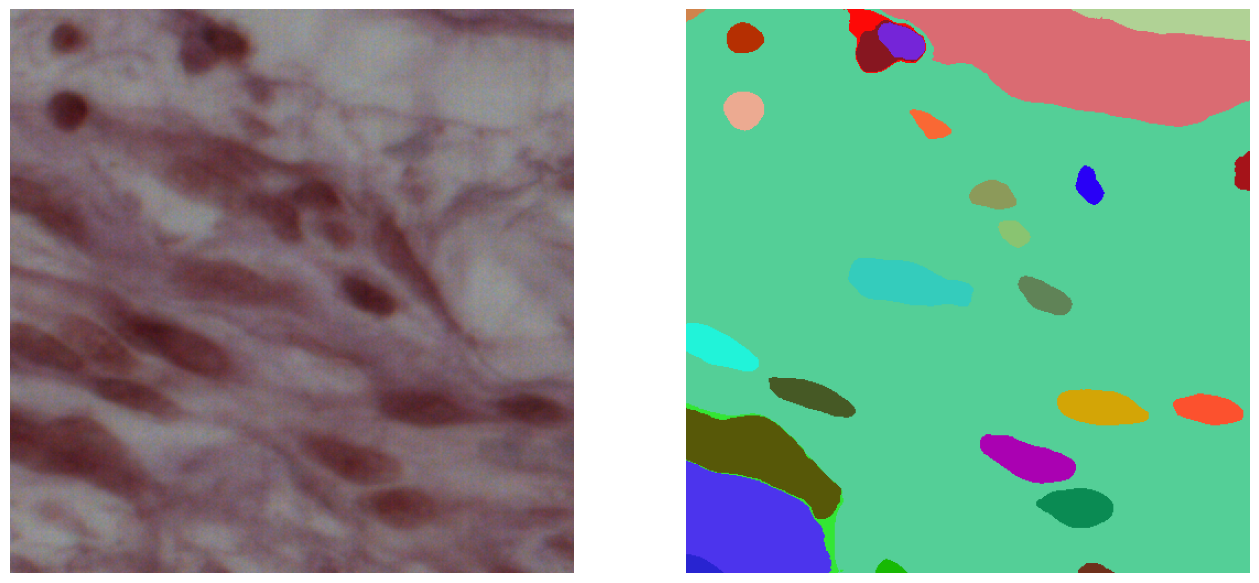

In [11]:
import random

import numpy as np

def show_anns(anns, axes=None):
    if len(anns) == 0:
        return
    if axes:
        ax = axes
    else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m**0.5)))

num_images = 10
random_indices = random.sample(range(len(train_dataset)), num_images)
image_tensor= train_dataset[0]['image']
image_path = f"{organized_data_path_train}/images/0.png"

print("Image Path: ",image_path)
image_information = cv2.imread(image_path)
image = cv2.resize(image_information, (512,512))
masks = mask_generator1.generate(image)

image_np = image_tensor.numpy()
# Reshape the image data to a valid shape
image_data = np.moveaxis(image_np, 0, -1)  # Move the channels axis to the last position
print(image_data.shape)  # Output: (256, 256, 3)
# Plot the original image and the mask


# Plot the original image and the mask
fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].imshow(image)
axs[1].imshow(image)
show_anns(masks, axs[1])
axs[0].axis('off')
axs[1].axis('off')
plt.show()
# for idx in random_indices:
#     # Get the image tensor
#     image_tensor= train_dataset[idx]

#     # Apply the mask generator
#     masks = mask_generator1.generate(image_tensor)

#     # Convert the image tensor back to a PIL image
#     image = torchvision.transforms.ToPILImage()(image_tensor)
    
#     # Plot the original image and the mask
#     fig, axs = plt.subplots(1, 2, figsize=(12, 4))
#     axs[0].imshow(image)
#     axs[1].imshow(image)
#     show_anns(masks, axs[len(image)][len(image[0])])
#     axs[0].axis('off')
#     axs[1].axis('off')
#     plt.show()

## Apply LORA To SAM

#### Create LoRa Model

#### Apply LoRa to SAM model and load into GPU

In [7]:
# Apply LoRa to Pretrained SAM checkpoint

from peft import get_peft_model, LoraConfig, TaskType


sam_checkpoint = f'{currentDirectory}/checkpoints/sam_vit_l_0b3195.pth'
model_type = "vit_l" #
device = "cuda" #cpu,cuda
rank = 4

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)

# Configure LoRa model:
lora_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["qkv", "proj"],
    lora_dropout=0.1,
    bias="none",
    task_type=TaskType.FEATURE_EXTRACTION,
)
lora_sam = get_peft_model(sam, lora_config)
lora_sam.print_trainable_parameters()

trainable params: 1,193,984 || all params: 313,536,816 || trainable%: 0.3808


In [8]:
# Wrap LoRa-SAM model with Decoder:

class LoRaSAMDecoder(nn.Module):
    def __init__(self, sam_model):
        super().__init__()
        self.encoder = sam_model.image_encoder

        self.decoder = nn.Sequential(
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 2, kernel_size=1)  # Binary segmentation
        )

    def forward(self, x):
        B, C, H, W = x.shape
        # print(f"[Input] x: {x.shape}")  # ✅ Sanity check input

        # Resize and normalize
        x = nn.functional.interpolate(x, size=(1024, 1024), mode='bilinear', align_corners=False)
        x = (x - 0.5) / 0.5
        # print(f"[Normalized] x: {x.shape}")  # ✅ Check preprocessing step

        # Pass through encoder
        features = self.encoder(x)
        # print(f"[Encoder output] features: {features.shape}")  # ✅ Confirm this is 4D (should be [B, 256, 32, 32])

        # Decoder output
        out = self.decoder(features)
        # print(f"[Decoder output before upsample] out: {out.shape}")  # e.g., [B, 2, 32, 32]

        # 🔼 Upsample to match ground truth mask resolution
        out = nn.functional.interpolate(out, size=(1024, 1024), mode='bilinear', align_corners=False)
        # print(f"[Decoder output after upsample] out: {out.shape}")  # Should now be [B, 2, 1024, 1024]

        return out
    

# Instantiate Decoded LoRaSam model
model = LoRaSAMDecoder(lora_sam).to(device)

In [9]:
!nvidia-smi

Thu Apr 10 15:17:53 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.120                Driver Version: 550.120        CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   44C    P0             34W /  125W |    1436MiB /  16376MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [15]:
# Create Image Mask Generator and predictor
mask_generator1 = SamAutomaticMaskGenerator(lora_sam, points_per_batch=16)
predictor = SamPredictor(lora_sam)

#### Test with LORA using Pretrained Model WITHOUT Finetuning

Image Path:  /mnt/Storage02/SoftwareDev/CAP_5516_Medical_Imaging_Computing/Assignments/Assignment_03/dataset/experiment/orig_train//images/0.png
(512, 512, 3)


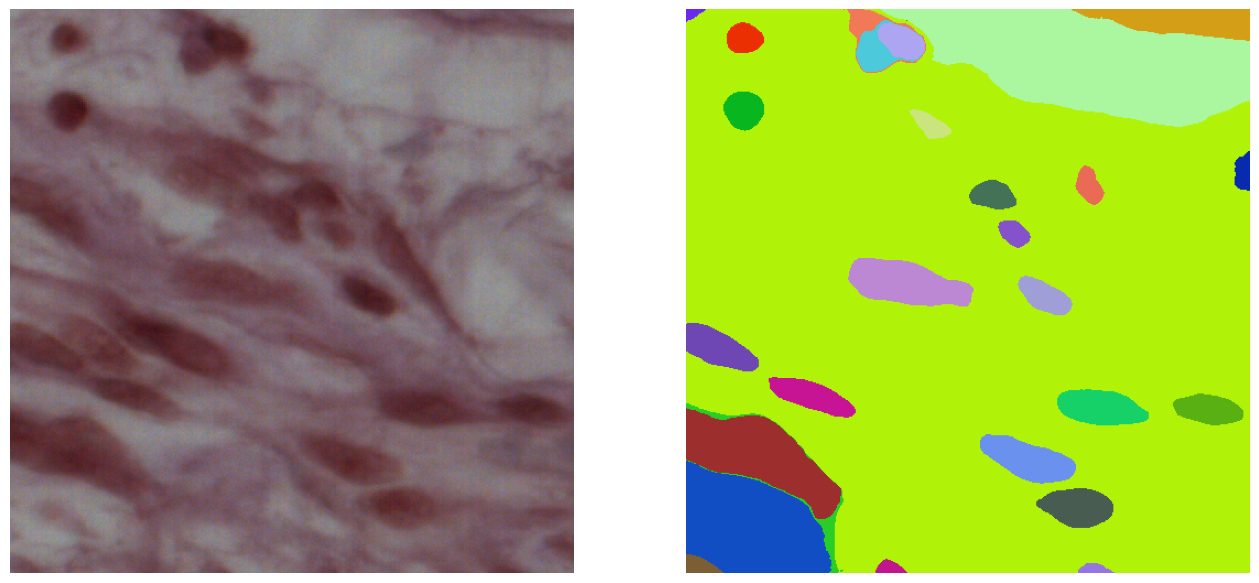

In [16]:
# Test Pretrained Model with LoRa WITHOUT Finetuning

import random

import numpy as np

def show_anns(anns, axes=None):
    if len(anns) == 0:
        return
    if axes:
        ax = axes
    else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m**0.5)))

num_images = 10
random_indices = random.sample(range(len(train_dataset)), num_images)
image_tensor= train_dataset[0]['image']
image_path = f"{organized_data_path_train}/images/0.png"

print("Image Path: ",image_path)
image_information = cv2.imread(image_path)
image = cv2.resize(image_information, (512,512))
masks = mask_generator1.generate(image)

image_np = image_tensor.numpy()
# Reshape the image data to a valid shape
image_data = np.moveaxis(image_np, 0, -1)  # Move the channels axis to the last position
print(image_data.shape)  # Output: (256, 256, 3)

# Plot the original image and the mask
fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].imshow(image)
axs[1].imshow(image)
show_anns(masks, axs[1])
axs[0].axis('off')
axs[1].axis('off')
plt.show()
# for idx in random_indices:
#     # Get the image tensor
#     image_tensor= train_dataset[idx]

#     # Apply the mask generator
#     masks = mask_generator1.generate(image_tensor)

#     # Convert the image tensor back to a PIL image
#     image = torchvision.transforms.ToPILImage()(image_tensor)
    
#     # Plot the original image and the mask
#     fig, axs = plt.subplots(1, 2, figsize=(12, 4))
#     axs[0].imshow(image)
#     axs[1].imshow(image)
#     show_anns(masks, axs[len(image)][len(image[0])])
#     axs[0].axis('off')
#     axs[1].axis('off')
#     plt.show()

## Fine Tune LORA Model on Nuclei Instance Segmentation on NulnSeg Dataset

#### Train LoRa

In [17]:
# Define Metrics

from sklearn.metrics import f1_score, jaccard_score
import numpy as np

def dice_score(preds, targets):
    preds = preds.flatten()
    targets = targets.flatten()
    return f1_score(targets, preds, average='binary')

def iou_score(preds, targets):
    preds = preds.flatten()
    targets = targets.flatten()
    return jaccard_score(targets, preds, average='binary')

def compute_pq(preds, targets):
    # Placeholder PQ implementation (real PQ needs instance-level labels)
    # For simplicity, we'll just use Dice + IoU average
    dice = dice_score(preds, targets)
    iou = iou_score(preds, targets)
    return (dice + iou) / 2


In [18]:
for i in train_loader:
    print(i)

{'image': tensor([[[[0.5490, 0.5804, 0.5255,  ..., 0.4902, 0.5569, 0.5529],
          [0.5333, 0.5843, 0.5294,  ..., 0.5020, 0.5569, 0.5608],
          [0.5451, 0.5961, 0.5686,  ..., 0.5333, 0.5412, 0.5451],
          ...,
          [0.5961, 0.5529, 0.5922,  ..., 0.5451, 0.5647, 0.6118],
          [0.5255, 0.5255, 0.5451,  ..., 0.4824, 0.5216, 0.5255],
          [0.5216, 0.6157, 0.6000,  ..., 0.5569, 0.5412, 0.5686]],

         [[0.2706, 0.2627, 0.2667,  ..., 0.2863, 0.2902, 0.2902],
          [0.2745, 0.2667, 0.2667,  ..., 0.2863, 0.2824, 0.2824],
          [0.2706, 0.2745, 0.2667,  ..., 0.2745, 0.2745, 0.2824],
          ...,
          [0.2627, 0.2627, 0.2588,  ..., 0.4118, 0.4235, 0.4078],
          [0.2471, 0.2510, 0.2510,  ..., 0.4118, 0.4078, 0.4157],
          [0.2627, 0.2588, 0.2549,  ..., 0.4314, 0.4235, 0.4078]],

         [[0.3725, 0.3804, 0.3765,  ..., 0.3608, 0.3765, 0.3882],
          [0.4078, 0.4078, 0.4235,  ..., 0.4078, 0.4353, 0.3725],
          [0.3765, 0.3882, 0.423

In [10]:
import torch.nn.functional as F
import torch.optim as optim
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
from segmentation_models_pytorch.losses import DiceLoss

fold_size = len(train_loader) // 5

all_dice, all_iou, all_pq = [], [], []

for fold in range(5):
    print(f"\n📂 Fold {fold + 1}")
    val_start = fold * fold_size
    val_end = (fold + 1) * fold_size if fold < 4 else len(train_loader)
    indices = list(range(len(train_loader)))
    val_indices = indices[val_start:val_end]
    train_indices = indices[:val_start] + indices[val_end:]



    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    dice_loss = DiceLoss(mode='binary')

    # Training loop
    for epoch in range(10):
        model.train()
        total_loss = 0
        for step, batch in enumerate(train_loader):
            

            imgs = batch['image'].to(device)
            masks = batch['label'].to(device)


            if masks.sum() == 0:
                continue  # ⛔ Skip batches with all-zero masks

            preds = model(imgs)
            preds = F.interpolate(preds, size=masks.shape[1:], mode='bilinear', align_corners=False)

            foreground_logits = preds[:, 1, :, :]
            pos_weight = torch.tensor(20.0).cuda()  # 🔧 Adjust this if needed

            bce_loss = F.binary_cross_entropy_with_logits(foreground_logits, masks.float(), pos_weight=pos_weight)
            loss = dice_loss(torch.sigmoid(foreground_logits), masks.float()) + bce_loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"✅ Epoch {epoch + 1} done. Avg Loss: {total_loss / len(train_loader):.4f}")


    # Validation loop
    model.eval()
    all_preds, all_masks = [], []
    with torch.no_grad():
        for batch in valid_loader:
            
            imgs = batch['image'].to(device)
            masks = batch['label'].to(device)
            
            preds = model(imgs)
            preds = F.interpolate(preds, size=masks.shape[1:], mode='bilinear', align_corners=False)

            foreground_probs = torch.sigmoid(preds[:, 1, :, :])
            # preds = (foreground_probs > 0.3).long()  # ⬅️ Lowered threshold
            preds = (foreground_probs > 0.1).long()  # Try 0.1 or even 0.05


            all_preds.append(preds.cpu().numpy())
            all_masks.append(masks.cpu().numpy())

    all_preds = np.concatenate(all_preds)
    all_masks = np.concatenate(all_masks)

    # ⚠️ Check class imbalance
    print(f"🔍 Fold {fold + 1} mask foreground ratio: {all_masks.sum() / all_masks.size:.6f}")
    print(f"🔍 Fold {fold + 1} pred foreground ratio: {all_preds.sum() / all_preds.size:.6f}")

    d = dice_score(all_preds, all_masks)
    i = iou_score(all_preds, all_masks)
    pq = compute_pq(all_preds, all_masks)
    all_dice.append(d)
    all_iou.append(i)
    all_pq.append(pq)

    print(f"📊 Fold {fold + 1} Dice: {d:.4f} | IoU: {i:.4f} | PQ: {pq:.4f}")

    # Visualize predictions
    imgs = imgs.cpu().numpy()
    masks = masks.cpu().numpy()
    preds = preds.cpu().numpy()

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1); plt.imshow(imgs[0].transpose(1, 2, 0)); plt.title("Input")
    plt.subplot(1, 3, 2); plt.imshow(masks[0]); plt.title("Ground Truth")
    plt.subplot(1, 3, 3); plt.imshow(preds[0]); plt.title("Prediction")
    plt.tight_layout()
    plt.show()

# Final report
print("\n📈 Final Results (5-Fold Avg):")
print(f"Dice: {np.mean(all_dice):.4f} | IoU: {np.mean(all_iou):.4f} | PQ: {np.mean(all_pq):.4f}")



📂 Fold 1


OutOfMemoryError: CUDA out of memory. Tried to allocate 8.00 GiB. GPU 0 has a total capacity of 15.70 GiB of which 1.17 GiB is free. Including non-PyTorch memory, this process has 14.52 GiB memory in use. Of the allocated memory 13.58 GiB is allocated by PyTorch, and 668.41 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [54]:
import torch.optim
import tqdm

# Training Parameters

lr = 1e-4
weight_decay = 1e-4
epochs= 40
save_path= sam_checkpoint = f'{currentDirectory}/checkpoints/lora_sam_best.pth'

# Set Some state variables
epoch_counter= 0
current_loss = 1
current_accuracy = 1
model_accuracy = []
model_loss = []


# Only Optimize LoRa parameters
optimizer = optim.Adam(
    [parameters for parameters in lora_sam.parameters() if parameters.requires_grad],
    lr= lr,
    weight_decay=weight_decay
)

# Create Loss Function
criterion = nn.CrossEntropyLoss()

# Create Training Loop
# Train Network
for epoch in range(epochs):
    train_loss= 0.0
    # store points for for plotting the accuracy and loss:
    for i,batch in enumerate(train_loader):
        lora_sam.train()
        
        # Get data to Cuda/gpu if possible
        images = batch['image'].to(device)
        labels = batch['label'].to(device)

        print(images.size())
        
    
        # Forward
        scores = lora_sam(images, multimask_output=False)
        loss = criterion(scores['label'], labels)

        # Go Backward in the network:
        optimizer.zero_grad()
        loss.backward()

        # Gradient descent or adam step
        optimizer.step()

        train_loss += loss.item()





# Save the trained model
torch.save(lora_sam.state_dict(),save_path)


torch.Size([8, 3, 512, 512])


IndexError: too many indices for tensor of dimension 3

In [91]:
def train_model(model, train_loader, criterion, optimizer, device, epochs):
    model.train()
    train_loss, total_samples, total_correct = 0,0,0
    
    for i,batch in enumerate(tqdm(train_loader)):
        imgs, labels = batch['image'].to(device), batch['label'].to(device)
        optimizer.zero_grad()
        
        outputs = model(imgs, multimask_output=False)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * imgs.size(0)
        _, predicted = torch.max(outputs.data,1)

        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        accuracy = (total_correct/total_samples)*100

    print("Trainining Epoch: [{}]  loss: [{:.2f}] Accuracy :[{:.2f}]".format(epochs+1, train_loss/len(train_loader), accuracy))

    return train_loss/len(train_loader), accuracy

# Five Fold Cross Validation

In [86]:
def test_model(model, test_loader, criterion,  device, epochs):
    model.eval()
    test_loss, total_samples, total_correct = 0,0,0
    with torch.no_grad():
        for i,batch in enumerate(tqdm(test_loader)):
            print(batch['image'])
            imgs, labels = batch['image'].to(device), batch['label'].to(device)

            outputs = model(imgs)
            loss = criterion(outputs, labels)

            test_loss += loss.item() * imgs.size(0)
            _, predicted = torch.max(outputs.data,1)

            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            accuracy = (total_correct/total_samples)*100

    print("Testing Epoch: [{}]  loss: [{:.2f}] Accuracy :[{:.2f}]".format(epochs+1, test_loss/len(test_loader), accuracy))

    return test_loss/len(test_loader), accuracy

In [87]:

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import torch
import torch.nn as nn
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader,random_split,Dataset, ConcatDataset ,SubsetRandomSampler 
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from torchinfo import summary
from tqdm import tqdm
from sklearn.model_selection import KFold 

k=5
splits=KFold(n_splits=k,shuffle=True,random_state=0)
per_fold_result={}

In [92]:
for i, (train_idx,val_idx) in enumerate(splits.split(np.arange(len(train_dataset)))):

    print("Fold no.{}:".format(i + 1))

    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(val_idx)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler, num_workers = 4)
    valid_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=valid_sampler, num_workers = 4)
    
    model = lora_sam

          
    optimizer = torch.optim.SGD(model.parameters(),lr=0.0001)
    criterion = nn.CrossEntropyLoss()

    history = {'train_loss': [], 'valid_loss': [],'train_acc':[],'valid_acc':[]}

    for epoch in range(40):
        train_loss, train_acc = train_model(model, train_loader, criterion, optimizer, device, epoch)
        valid_loss, valid_acc = test_model(model, valid_loader, criterion, device, epoch)
            
        history['train_loss'].append(train_loss)
        history['valid_loss'].append(valid_loss)
        history['train_acc'].append(train_acc)
        history['valid_acc'].append(valid_acc)

    per_fold_result['fold{}'.format(i+1)] = history 

Fold no.1:


  0%|          | 0/48 [00:00<?, ?it/s]


IndexError: too many indices for tensor of dimension 3

In [78]:
for i, batch in enumerate(tqdm(test_loader)):
    print(batch['image'])

 73%|███████▎  | 8/11 [00:00<00:00, 32.73it/s]

tensor([[[[0.6157, 0.6235, 0.6039,  ..., 0.5529, 0.5725, 0.4784],
          [0.5608, 0.5804, 0.6314,  ..., 0.5843, 0.5569, 0.5333],
          [0.5843, 0.5922, 0.5765,  ..., 0.5451, 0.5725, 0.4902],
          ...,
          [0.5686, 0.5804, 0.5961,  ..., 0.5373, 0.6314, 0.5490],
          [0.5333, 0.5451, 0.5765,  ..., 0.5922, 0.6353, 0.5686],
          [0.5333, 0.5373, 0.5765,  ..., 0.6078, 0.6314, 0.5451]],

         [[0.3725, 0.3686, 0.3686,  ..., 0.3451, 0.3451, 0.3451],
          [0.3725, 0.3765, 0.3765,  ..., 0.3529, 0.3529, 0.3529],
          [0.3725, 0.3725, 0.3725,  ..., 0.3569, 0.3569, 0.3529],
          ...,
          [0.3882, 0.3882, 0.3804,  ..., 0.3725, 0.3647, 0.3725],
          [0.3882, 0.3922, 0.3961,  ..., 0.3725, 0.3725, 0.3804],
          [0.3843, 0.3843, 0.3961,  ..., 0.3725, 0.3686, 0.3804]],

         [[0.4902, 0.4627, 0.4510,  ..., 0.4824, 0.4706, 0.4745],
          [0.4941, 0.4510, 0.4471,  ..., 0.4745, 0.4706, 0.4706],
          [0.5137, 0.4588, 0.4471,  ..., 0

100%|██████████| 11/11 [00:00<00:00, 27.81it/s]
